Сначала нужно определить какие столбцы мы хотим загрузить из нашей таблицы. 

Так, для моего примера мне нужны столбцы Volume(unit)(2), SurfaceArea (um2)(5) + количество строк.

Шаг1. Извлечение данных из xlsx в df, с которыми я смогу работать в python

glob - показывает пути к файлам с указанным расширением и сохраняет в переменную filepaths

создаем пустой датафрейм, куда будут загружаться считанные столбики таблиц

в цикле объединяем датафреймы из считанных файлов 

Нужно изменить названия столбцов,чтобы было очевидно их происхождение из другого файла. 

Для этого была написана функция columns_rename, где в цикле добавляется порядковый номер файла, из которого происходило извлечение


Далее заменяем измененным названиями столбцов действующие названия в датафрейме.

In [6]:
from IPython import get_ipython
get_ipython().magic('reset -sf') 

import pandas as pd
import numpy as np
import glob

def file_extraction(search_string, N, stack_num): 
    filepaths = glob.glob(search_string, recursive=True) #можно изменять номера в N1*stack1,чтобы извлечь другие файлы
    df = pd.DataFrame()
    for find_files in filepaths:
        df = df.join (pd.read_excel(find_files, usecols=[1,4]), how='outer',lsuffix=' ')
    
    columns_names = [j for j in df.columns.tolist()]

    def columns_rename(columns_names):
        j=1
        for i in range (0, len(columns_names), 2):
            columns_names[i] = 'N' + str(N) + '_stack' + str(stack_num) + '_cell' +  str(j)+ '_' + columns_names[i] #можно изменять номера в N1*stack1,чтобы отметить 
            columns_names[i+1] = 'N' + str(N) + '_stack' + str(stack_num) + '_cell' +  str(j)+ '_'  + columns_names[i+1]    # принадлежность к другой партии данных
            j+=1
        return(columns_names)
    df.set_axis(columns_rename(columns_names), axis=1, inplace=True)
    return(df)
N1_stack1 = file_extraction('**/N1*stack1*.xlsx', 1, 1)
N1_stack2 = file_extraction('**/N1*stack2*.xlsx', 1, 2)

Посмотрим на значения основных критериев описательной статистики

In [7]:
N1_stack1.describe()

,N1_stack1_cell1_Volume (unit),N1_stack1_cell1_SurfaceArea,N1_stack1_cell2_Volume (unit),N1_stack1_cell2_SurfaceArea
count,3818.000000,3818.000000,3902.000000,3902.000000
mean,0.424083,4.567595,0.379947,4.037284
std,0.270616,2.123704,0.243734,1.827245
min,0.010741,0.333797,0.010741,0.333797
25%,0.225564,2.992793,0.204081,2.729861
50%,0.372359,4.350735,0.325814,3.790924
75%,0.572860,5.906711,0.501252,5.145034
max,2.842817,17.403682,2.345145,15.863077


Извлекаем отдельно столбцы, анализ которых будем выполнять.
из-за присутствия NaN не считает перцентили. ПОдумать как это можно разрешить

In [13]:
N11_cell_volume = N1_stack1.iloc[:, 0:4:2].copy()
N11_cell_surf = N1_stack1.iloc[:, 1:4:2].copy()
q25, q75 = np.percentile(N1_stack1.iloc[:, 1],[.25,.75])
N1_stack1.iloc[:, 0]

0       0.078768
1       0.150376
2       0.336555
3       0.268528
4       0.429645
          ...   
3897         NaN
3898         NaN
3899         NaN
3900         NaN
3901         NaN
Name: N1_stack1_cell1_Volume (unit) , Length: 3902, dtype: float64

Построим графики, чтобы лучше понять данные

Freedman–Diaconis number of bins: N1_stack1_cell1_Volume (unit)    NaN
N1_stack1_cell2_Volume (unit)    NaN
dtype: float64


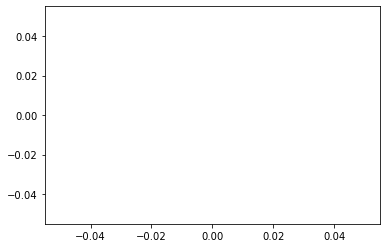

In [10]:
import matplotlib.pyplot as plt
q25, q75 = np.percentile(N1_stack1.iloc[:, 0:4:2],[.25,.75])
bin_width = 2*(q75 - q25)*len(N11_cell_volume)**(-1/3)
bins = round((N11_cell_volume.max() - N11_cell_volume.min())/bin_width)
print("Freedman–Diaconis number of bins:", bins)
plt.hist(N11_cell_volume, bins = bins);

#plt.hist(N1_stack1.iloc[:, 0:4:2], density=True, bins = bins)  
plt.show()